C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [07:21:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "feature_fraction", "metric", "min_child_samples", "min_impurity_decrease", "min_weight_fraction_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueEr

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Info] Number of positive: 906, number of negative: 1115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 2021, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448293 -> initscore=-0.207570
[LightGBM] [Info] Start training from score -0.207570


C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [07:22:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "feature_fraction", "metric", "min_child_samples", "min_impurity_decrease", "min_weight_fraction_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Info] Number of positive: 724, number of negative: 892
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 1616, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448020 -> initscore=-0.208675
[LightGBM] [Info] Start training from score -0.208675
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warn

C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


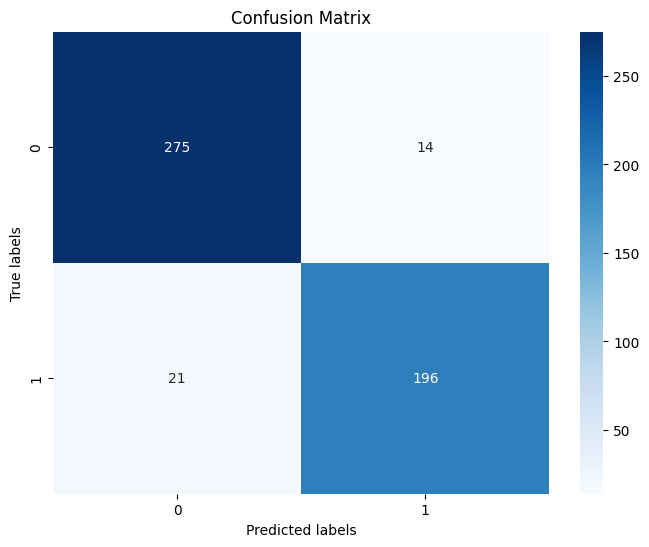

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

class RandomForest:
    def __init__(self, n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, 
                 max_features, bootstrap, learning_rate, subsample, colsample_bytree, num_leaves, gamma,
                 objective='binary:logistic', max_leaf_nodes=None, min_impurity_decrease=0.0,
                 min_weight_fraction_leaf=0.0, min_child_samples=20, feature_fraction=0.6,  metric='logloss'):
        self.n_estimators = n_estimators
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.random_state = 42
        self.stacking_model = None  
        self.predictions = []
        self.learning_rate = learning_rate  
        self.subsample = subsample  
        self.colsample_bytree = colsample_bytree  
        self.num_leaves = num_leaves
        self.gamma = gamma
        self.objective = objective
        self.max_leaf_nodes = max_leaf_nodes
        self.min_impurity_decrease = min_impurity_decrease
        self.min_weight_fraction_leaf = min_weight_fraction_leaf
        self.min_child_samples = min_child_samples
        self.feature_fraction = feature_fraction
        self.metric = metric

    def fit(self, X, y):        
        estimators = [
            ('xgb', XGBClassifier(n_estimators=self.n_estimators, max_depth=self.max_depth, random_state=self.random_state,
                                  learning_rate=self.learning_rate, subsample=self.subsample, colsample_bytree=self.colsample_bytree,
                                  gamma=self.gamma, objective=self.objective, max_leaf_nodes=self.max_leaf_nodes,
                                  min_impurity_decrease=self.min_impurity_decrease, min_weight_fraction_leaf=self.min_weight_fraction_leaf,
                                  min_child_samples=self.min_child_samples, feature_fraction=self.feature_fraction,metric=self.metric)),
            
            ('lgbm', LGBMClassifier(n_estimators=self.n_estimators, max_depth=self.max_depth, random_state=self.random_state,
                                    learning_rate=self.learning_rate, subsample=self.subsample, colsample_bytree=self.colsample_bytree,
                                    num_leaves=self.num_leaves, max_leaf_nodes=self.max_leaf_nodes,
                                    min_child_samples=self.min_child_samples, feature_fraction=self.feature_fraction)),
            
            ('extra_trees', ExtraTreesClassifier(n_estimators=self.n_estimators, criterion=self.criterion,
                                                 max_depth=self.max_depth, min_samples_split=self.min_samples_split,
                                                 min_samples_leaf=self.min_samples_leaf, max_features=self.max_features,
                                                 bootstrap=self.bootstrap, random_state=self.random_state))]
            
        # Definir el clasificador de nivel 2 (modelo base)
        rf_base = RandomForestClassifier(n_estimators=self.n_estimators, random_state=self.random_state)
        
        # Crear el modelo de stacking
        self.stacking_model = StackingClassifier(estimators=estimators, final_estimator=rf_base)
        self.stacking_model.fit(X, y)

    def predict(self, X):
        return self.stacking_model.predict(X)

    def get_params(self, deep=True):
        return {
            'n_estimators': self.n_estimators,
            'criterion': self.criterion,
            'max_depth': self.max_depth,
            'min_samples_split': self.min_samples_split,
            'min_samples_leaf': self.min_samples_leaf,
            'max_features': self.max_features,
            'bootstrap': self.bootstrap,
            'learning_rate': self.learning_rate,
            'subsample': self.subsample,
            'colsample_bytree': self.colsample_bytree,
            'num_leaves': self.num_leaves,
            'gamma': self.gamma,
            'objective': self.objective,
            'max_leaf_nodes': self.max_leaf_nodes,
            'min_impurity_decrease': self.min_impurity_decrease,
            'min_weight_fraction_leaf': self.min_weight_fraction_leaf,
            'min_child_samples': self.min_child_samples,
            'feature_fraction': self.feature_fraction,
            'metric': self.metric
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


class RandomForestClassifierWrapper:
    def __init__(self, X, y, n_estimators, criterion, max_depth, min_samples_split,
                 min_samples_leaf, max_features, bootstrap, learning_rate, subsample, colsample_bytree, num_leaves, gamma,
                 objective='binary:logistic', max_leaf_nodes=None, min_impurity_decrease=0.0,
                 min_weight_fraction_leaf=0.0, min_child_samples=20, feature_fraction=0.6, metric='logloss'):
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        self.X_train = self.X_train.values
        self.y_train = self.y_train.values
        
        self.rf = RandomForest(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                max_features=max_features, bootstrap=bootstrap,
                                learning_rate=learning_rate, subsample=subsample,
                                colsample_bytree=colsample_bytree, num_leaves=num_leaves, gamma=gamma,
                                objective=objective, max_leaf_nodes=max_leaf_nodes,
                                min_impurity_decrease=min_impurity_decrease, min_weight_fraction_leaf=min_weight_fraction_leaf,
                                min_child_samples=min_child_samples, feature_fraction=feature_fraction,metric = metric)

    def train(self):
        self.rf.fit(self.X_train, self.y_train)
        
    def predict(self):
        return self.rf.predict(self.X_test)

    def evaluate(self):
        y_pred = self.predict()        
        accuracy = accuracy_score(self.y_test, y_pred)
        precision = precision_score(self.y_test, y_pred, average='macro')
        recall = recall_score(self.y_test, y_pred, average='macro')
        f1 = f1_score(self.y_test, y_pred, average='macro')
        return accuracy, precision, recall, f1

    def paint_confusion_matrix(self):
        # Calcular la matriz de confusión
        conf_matrix = confusion_matrix(self.y_test, self.predict())
        
        # Visualizar la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(self.y_test), yticklabels=np.unique(self.y_test))
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()


class Resultado:
    def __init__(self, parametros):
        self.parametros = parametros
        self.metricas = {'Accuracy': None, 'Precision': None, 'Recall': None, 'F1-score': None}

    def update_metrics(self, accuracy, precision, recall, f1_score):
        self.metricas['Accuracy'] = accuracy
        self.metricas['Precision'] = precision
        self.metricas['Recall'] = recall
        self.metricas['F1-score'] = f1_score
        print("Métricas:\n")
        for metrica, valor in self.metricas.items():
            print(f"{metrica}: {valor * 100:.2f}%")
        print("\n\n\n")
        
    

def loadBalancedDataSet():
    """
    Carga un conjunto de datos balanceado desde un archivo Excel.   
    Returns:
    - X (DataFrame): Características del conjunto de datos.
    - y (Series): Etiquetas del conjunto de datos.
    """
     # Obtener la ruta del directorio actual
    ruta_actual = os.getcwd()
    # Concatenar el nombre del archivo al final de la ruta actual
    archivo = os.path.join(ruta_actual, 'Balanced_Data_Set.xlsx')
    # Cargar datos
    df = pd.read_excel(archivo)
    
    #df = pd.read_excel(file_path)
    X = df.drop('CONDUCTA', axis=1)
    y = df['CONDUCTA']
    return X, y

def loadOptimizedParameters():
    """
    Carga los parámetros optimizados desde un archivo Excel.
    Returns:
    - parametros (dict): Parámetros optimizados.
    """
    
    # Obtener la ruta del directorio actual
    ruta_actual = os.getcwd()
    # Concatenar el nombre del archivo al final de la ruta actual
    archivo = os.path.join(ruta_actual, 'ParametrosOptimización.xlsx')
    # Cargar datos
    parametros_df = pd.read_excel(archivo)

    #parametros_df = pd.read_excel(file_path)
    fila = parametros_df.iloc[0]
    parametros = dict(zip(parametros_df.columns, fila))
    return parametros



balanced_data_file = "C:\\Users\\klgt1\\Downloads\\dataset_BALANCEADO.xlsx"
optimized_params_file = "C:\\Users\\klgt1\\Downloads\\ParametrosOptimización.xlsx"

X, y = loadBalancedDataSet()

parametros = loadOptimizedParameters()

# Ejecutar el clasificador con los parámetros actuales
wrapper = RandomForestClassifierWrapper(X, y, **parametros)
wrapper.train()

# Obtener los resultados de print_metrics
accuracy, precision, recall, f1_score = wrapper.evaluate()

# Crear un objeto Resultado y actualizar sus métricas
resultado = Resultado(parametros)
resultado.update_metrics(accuracy, precision, recall, f1_score)

wrapper.paint_confusion_matrix()
